## Analysis of 20 NewsGroups data

This is version 1.0 of the Analysis section. Included are:


1) number of documents and words per category

2) Plots of most common words for each category

3) Proportion of POS 

4) Bigram analysis


data imported as csv after text cleaning, but pre-vectorising.


In [2]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
proj_dir='/content/drive/MyDrive/Colab Notebooks/doc2vec/' #give your project directory here. data sets should be in this location

In [5]:
pd.set_option('display.max_columns', None)  

In [6]:
''' loading the cleaned data '''

train_cleaned_df = pd.read_csv(proj_dir+'train_cleaned_data.csv')
train_cleaned_df.head()

Unnamed: 0                                              texts  \
0           0   Subject: Put ex. syquest in Centris 610?\n Fr...   
1           1   From: walsteyn@fys.ruu.nl (Fred Walsteijn)\n ...   
2           2   From: choo@ecs.umass.edu\n Subject: TechWorks...   
3           3   From: ejbehr@rs6000.cmp.ilstu.edu (Eric Behr)...   
4           4   From: jmk13@po.cwru.edu (Joseph M. Kasanic)\n...   

                                        text cleaned            folder name  \
0  remember reading thread day ago mentioned remo...  comp.sys.mac.hardware   
1  ive seen following problem om three mac iisi m...  comp.sys.mac.hardware   
2  greeting present meg meg add mathcoprocessor t...  comp.sys.mac.hardware   
3  quick summary recent finding high speed modem ...  comp.sys.mac.hardware   
4  article johnc set buy one office use scanning ...  comp.sys.mac.hardware   

   file name  
0      51651  
1      51832  
2      50482  
3      51862  
4      50546

In [7]:
# number of documents
print(len(train_cleaned_df))

11314


In [49]:
# number documents in each category
print(train_cleaned_df["folder name"].value_counts())

# output as a pandas dataframe
data_summary_df = pd.DataFrame(train_cleaned_df["folder name"].value_counts()).reset_index()

rec.sport.hockey            600
soc.religion.christian      599
rec.motorcycles             598
rec.sport.baseball          597
sci.crypt                   595
sci.med                     594
rec.autos                   594
sci.space                   593
comp.windows.x              593
comp.os.ms-windows.misc     591
sci.electronics             591
comp.sys.ibm.pc.hardware    590
misc.forsale                585
comp.graphics               584
comp.sys.mac.hardware       578
talk.politics.mideast       564
talk.politics.guns          546
alt.atheism                 480
talk.politics.misc          465
talk.religion.misc          377
Name: folder name, dtype: int64


In [47]:
data_summary_df

index  folder name
0           rec.sport.hockey          600
1     soc.religion.christian          599
2            rec.motorcycles          598
3         rec.sport.baseball          597
4                  sci.crypt          595
5                    sci.med          594
6                  rec.autos          594
7                  sci.space          593
8             comp.windows.x          593
9    comp.os.ms-windows.misc          591
10           sci.electronics          591
11  comp.sys.ibm.pc.hardware          590
12              misc.forsale          585
13             comp.graphics          584
14     comp.sys.mac.hardware          578
15     talk.politics.mideast          564
16        talk.politics.guns          546
17               alt.atheism          480
18        talk.politics.misc          465
19        talk.religion.misc          377

In [9]:
# Fix NaNs
train_cleaned_df['text cleaned'] = np.where(train_cleaned_df['text cleaned'].isnull(),train_cleaned_df['folder name'],train_cleaned_df['text cleaned'])

In [10]:
'''
from sklearn.preprocessing import MultiLabelBinarizer

s = train_cleaned_df['text cleaned'].str.split()
mlb = MultiLabelBinarizer()
mlb.fit(s)
out = pd.DataFrame(mlb.transform(s),columns=mlb.classes_).groupby(train_cleaned_df['folder name']).sum()
out.replace(0,np.nan).stack().astype(int)


out.head(20)
'''

"\nfrom sklearn.preprocessing import MultiLabelBinarizer\n\ns = train_cleaned_df['text cleaned'].str.split()\nmlb = MultiLabelBinarizer()\nmlb.fit(s)\nout = pd.DataFrame(mlb.transform(s),columns=mlb.classes_).groupby(train_cleaned_df['folder name']).sum()\nout.replace(0,np.nan).stack().astype(int)\n\n\nout.head(20)\n"

In [11]:
# count words per category
(train_cleaned_df.assign(text=train_cleaned_df['text cleaned'].str.split()).explode("text cleaned")
 .groupby("folder name",sort=False)['text cleaned'].value_counts())

folder name            text cleaned                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [12]:
# Group Data by category
train_cl_gr_df   = train_cleaned_df.groupby('folder name').agg({'text cleaned': ','.join}).reset_index()
train_cl_gr_df

folder name  \
0                alt.atheism   
1              comp.graphics   
2    comp.os.ms-windows.misc   
3   comp.sys.ibm.pc.hardware   
4      comp.sys.mac.hardware   
5             comp.windows.x   
6               misc.forsale   
7                  rec.autos   
8            rec.motorcycles   
9         rec.sport.baseball   
10          rec.sport.hockey   
11                 sci.crypt   
12           sci.electronics   
13                   sci.med   
14                 sci.space   
15    soc.religion.christian   
16        talk.politics.guns   
17     talk.politics.mideast   
18        talk.politics.misc   
19        talk.religion.misc   

                                         text cleaned  
0   created image gaea therefore must pinnacle cre...  
1   anybody know good dgraphics package available ...  
2   well latest window magazine advertisement prog...  
3   model number interlaced dp btw number contact ...  
4   remember reading thread day ago mentioned remo...  
5   hi im new group please bear two year ago wrote...  
6   month old stereo system sale luxman r receiver...  
7   article anyone experience geicos extended plan...  
8   ummmdid bike kx id suggest look zx since horse...  
9   polish jewish mutually exclusive didnt mean of...  
10  meaningless compare one player plusminus stati...  
11  marc horowitz received mail mitch kapor saying...  
12  site really dont know post question figured bo...  
13  believe illegal residency discriminate fmgs tr...  
14  since dont money keep going changing seperate ...  
15  one thing dont understand sacred make temple r...  
16  article steve consider got ive made claim plea...  
17  people village regular inhabitant go daily bus...  
18  well seems national sale tax gotten cnn news l...  
19  think david koresh didnt solid structure sound...

In [57]:
# total words per group
train_cl_gr_df['total words'] =train_cl_gr_df['text cleaned'].apply(lambda x: len(x.split()))

data_summary_df['total words'] = train_cl_gr_df['text cleaned'].apply(lambda x: len(x.split()))

# average words per doc

data_summary_df['average words'] = data_summary_df['total words'] / data_summary_df['folder name']

data_summary_df

index  folder name  total words  average words
0           rec.sport.hockey          600        67385     112.308333
1     soc.religion.christian          599        56353      94.078464
2            rec.motorcycles          598        50948      85.197324
3         rec.sport.baseball          597        48298      80.901173
4                  sci.crypt          595        42867      72.045378
5                    sci.med          594        79624     134.047138
6                  rec.autos          594        35869      60.385522
7                  sci.space          593        55166      93.028668
8             comp.windows.x          593        49193      82.956155
9    comp.os.ms-windows.misc          591        54828      92.771574
10           sci.electronics          591        72390     122.487310
11  comp.sys.ibm.pc.hardware          590       101427     171.910169
12              misc.forsale          585        51022      87.217094
13             comp.graphics          584        78629     134.638699
14     comp.sys.mac.hardware          578        81608     141.190311
15     talk.politics.mideast          564        92699     164.359929
16        talk.politics.guns          546        85512     156.615385
17               alt.atheism          480       125966     262.429167
18        talk.politics.misc          465        88406     190.120430
19        talk.religion.misc          377        54878     145.564987

target_df:  1
0    created image gaea therefore must pinnacle creation creates birth continues cut religious crap im woman thanks sexism started road atheism maddi hausmann centigram communication corp san jose california kid please dont try home remember post professionallyrefuting nothing simply telling see childish propaganda nothing refuted bcci islamic bank post nothing islamic bank tiring infantile garbage simply evaluated could maybe flesh bit miss full grandeur content virtue blinding atheism may difficulty seeing light head as suggest making sure case posting time lesson debate gregg yeah right noticed post topic socreligionislam since topic bcci beingnot islamic bank come left one mention bcci bank called bcci adapted koran rule banking bibliography bennett neil bcci adapted koran rule banking time august let see guy writes piece title implies something case must support position intend anyone respect gregg question even managed include reference head firmly engaged as whats 

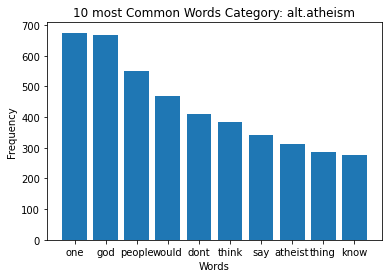

<Figure size 1440x720 with 0 Axes>

target_df:  1
1    anybody know good dgraphics package available ibm r aix im looking something like dec gks hewlettpackards starbase reasonably good support different output device like plotter terminal x etc tried also xgks x distribution ibms implementation phigs work require output device xwindows salesman ibm familiar graphic expecting good solution ari ari suutari carelcomp oy lappeenranta finlandread there special prize bottom amaze friend gain respect peer carry long number original question meaning life universe everything answer generated deep thought nd largest computer ever created deep thought realized understand answer one must really know question unfortunately didnt able help build largest computer named earth could figure real question know background arthur pulled scrabble tile bag spelled nine time six like however clear monkeyman right question brain especially since lady diner vaporized moment later came answer everyone could get along hand marvin said saw answer d

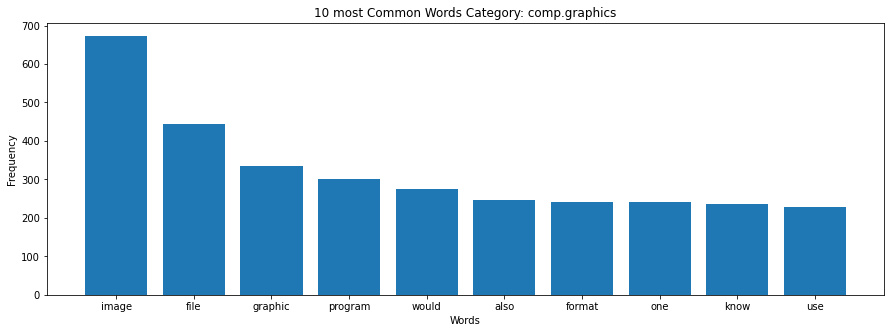

<Figure size 1440x720 with 0 Axes>

target_df:  1
2    well latest window magazine advertisement program help uninstall window apps harddisk uninstaller used update network deleting adding changing ini file uninstaller microhelp inc also looking ini updater pc network far without luck time pushing do batch language limitlook do assumming do command maybe even moreor lessimproved replace command use update user personal file master set batch file run everytime invoke window basically overwrites color scheme need neat jobim looking better solution though mike relaying knowa profit service mike bendtsen msbendts mtuedu elm st apt ccli senior technical consultant hancock mi michigan technological universitywould like know current fax software available window take baud faxmodem k please respond info thank much chad toelle st philip rd mt vernon uunetevansvilleedutoelleanybody know ftp site latest window driver ati gup thanksanyone know program monoumb available checked window system disk monoumb one thanks stan kucera stan k

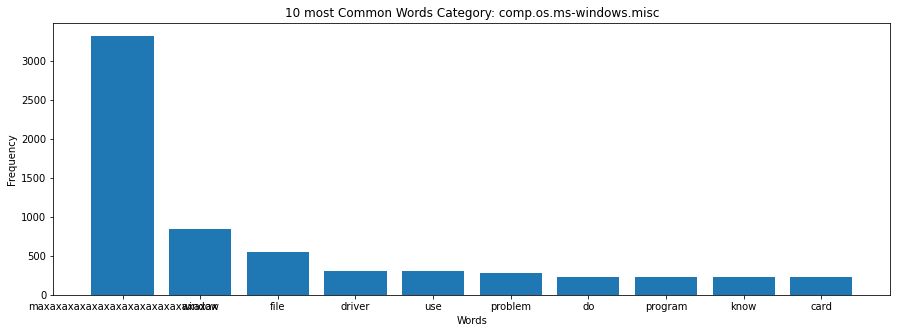

<Figure size 1440x720 with 0 Axes>

target_df:  1
3    model number interlaced dp btw number contact company would really helpful thanks replying beginning believe never going get reply posted netnews bboard first message sent returned didnt know second message would get calvinstable build driver people success installing running ive using build driver gwk dxv several week problem im running window x software ive run worked fine includes many game cdbased multimedia encyclopedia fullmotion video work fine id recommend give try john john gayman wawbulooking buying companion brand vlbisaeisa motherboards hint chipsets anybody experience board good bad information would helpful thanks brian j schaufenbuel believe vleisaisa motherboard us hint chipset limited bit eisa dma real eisa dma bit hint eisa dma mb ram addressing limitation isa reason would pas one hawk vleisaisa look ing replace exactly reason please doublecheck word call motherboard manufacturer ask motherboard support true bit eisa dma limitation motherboard work 

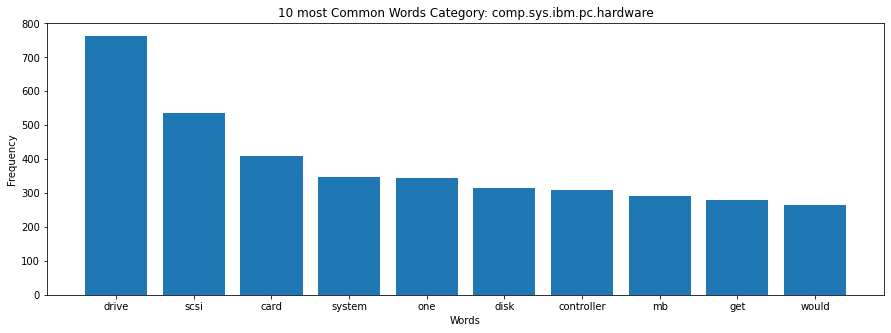

<Figure size 1440x720 with 0 Axes>

target_df:  1
4    remember reading thread day ago mentioned removing external syquest drive case dropping internal drive centris going couple question pli syquest drive wire drive id switch outside case connect switch computer tell internal drive noticed drive lay part motherboard didnt look closely seem recall laying ram thats soldered onto motherboard would cause problem one last question anywhere order faceplate cover drive front panel smaller space left case drive panel size spotsbm clone case cut hole plastic panel currently holding tmpty place an welcomed thanks keith moffattive seen following problem om three mac iisi machine mb ram installed n simms content window calculated updated lot strange horizontal line temporarily generated screen line translate top screen slightly lower brightness surroundings millimeter apart admit vague still distinguished clearly especially environment ie rest room bit dark previewer directtex ie dvireader kaleidagraph fpu spyglass transform contou

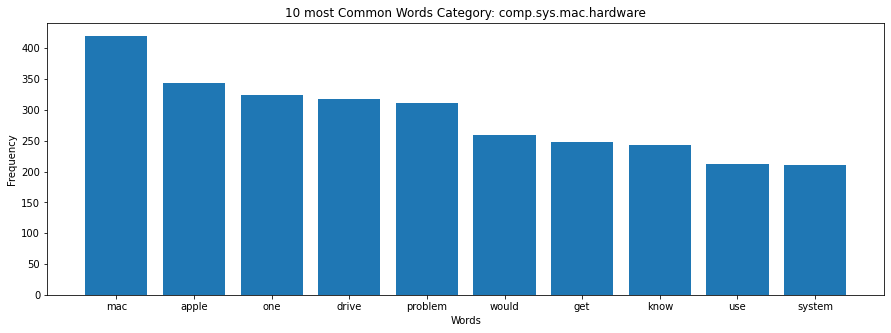

<Figure size 1440x720 with 0 Axes>

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



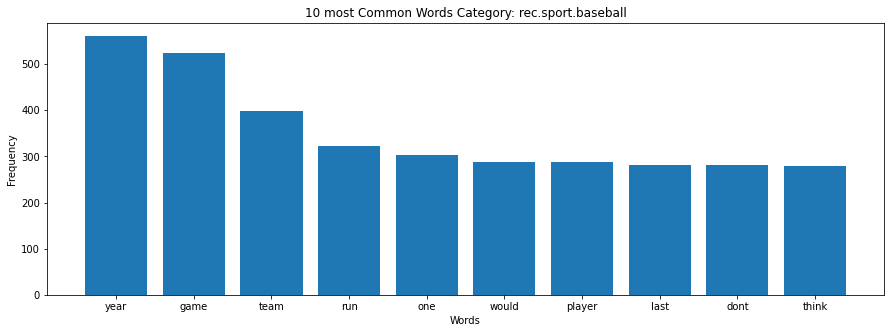

<Figure size 1440x720 with 0 Axes>

target_df:  1
10    meaningless compare one player plusminus statistic another player context role playing time player involved compare jagrs franciss plusminus ridiculous absurd geraldten year ago number european nhl roughly quarter going season number euro xenophobic trash deleted im creation european hockey league let bures selannes world play continent dont want mine youre going go extreme guess youd better start packing unless youre native north american isnt continent either lorilittle bio sunsentinel torrey architect four consecutive stanley cup champion persident general manager new york islander throughout year nhl bill torreys bow tie become much signature andre agassis hair panther introduce uniform insignia ticketprice information early next month meantime huizenga leaf daytoday operation hand torrey bob clarke vp gm san jose shark ottawa senator second gm alreadyid willing wager shark senator probably see rd gm perhaps th see panther second geraldthorne good ive always fan

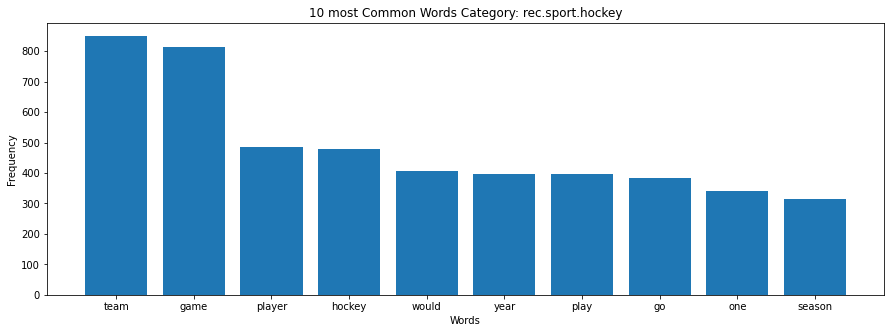

<Figure size 1440x720 with 0 Axes>

target_df:  1
11    marc horowitz received mail mitch kapor saying ask list know added im sure applies others list guess initial theory right clipper list someone idea bad joke guess happy wasnt conspiracy also contact mitch believe say didnt ask clipper list also forwarded traffic recieved list placed ftp site however first alias clipper list csspab another mailing list basically contained address staffer board member nist security board several people account within dockmaster domain people might wish foia harry harry shapiro list administrator extropy institute mailing list private communication extropian community sinceread twice replace prince government president appropriate read chapter xx prince n macchiavelli translated daniel donno order keep land secure prince disarmed subject others prompted division within city subjugated nurtured animosity others sought win approval initially distrusted erected fortress others destroyed although impossible set definite judgement measure w

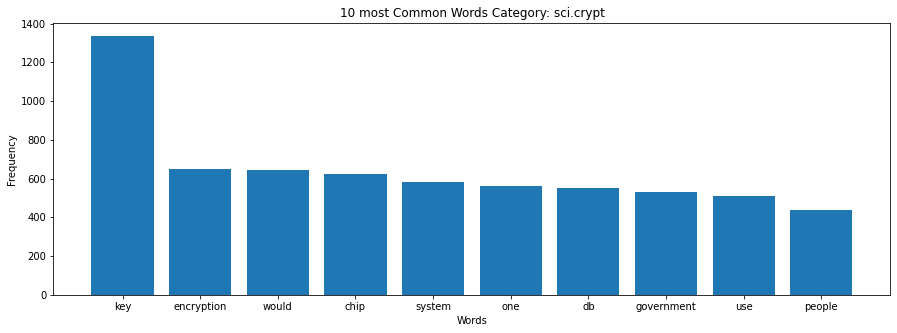

<Figure size 1440x720 with 0 Axes>

target_df:  1
12    site really dont know post question figured board would appropriate wondering massive concrete cylinder ever present nuclear poer site look like cylinder pinched middle anybody know actual purpose thing hear theyre called cooling tower heck cool great explaination however left one detail always see nuclear plant always fossil fuel plant nuclear plant prefered run water closed cycle whereas fossil fuel plant case get away dumping hot water recall water isnt hot thermodynamically many fossil fuel plant course le danger radioactive contamination actually fossil fuel plant run hotter usual boilingwater reactor nuclear plant there gripe industry nuclear power us vintage steam technology important nuclear plant get cold end system cold possible hence big cooling tower oil gas fired steam plant also condenser usually sized get steam back hot water way ambient plant cool condenser water rather air one canadian official asked thermal pollution deicing river said view heat re

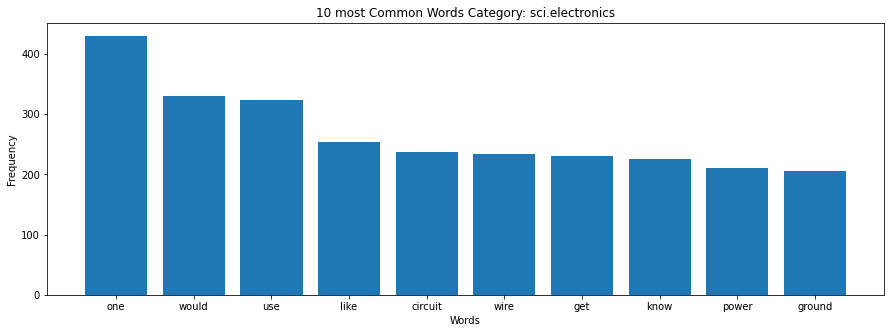

<Figure size 1440x720 with 0 Axes>

target_df:  1
13    believe illegal residency discriminate fmgs true know wont even interview fmgs program discriminate given fmg equally qualified american take american right actually matter u citizen good luck fmgs bad luck best resident fmgs also worst turn worst fmgs often u citizen studied offshore medical school resident fired incompetence year ive department fmgs u citizen studied guadalajara u citizen trained soviet union one philipina unfortunately practicing medicine somewhere neurology picked program psychiatry emergency medicine gordon bank njxp skepticism chastity intellect shameful surrender soonditto disease great leveling experience however people much afronted find money world buy one health everyone look die money buy one health talking paying medical expense currently adequately covered herman would think people wouldcould distinguish health treatment disease prevention medicine people preach time cannot buy health buy treatment disease assuming lucky enough disease

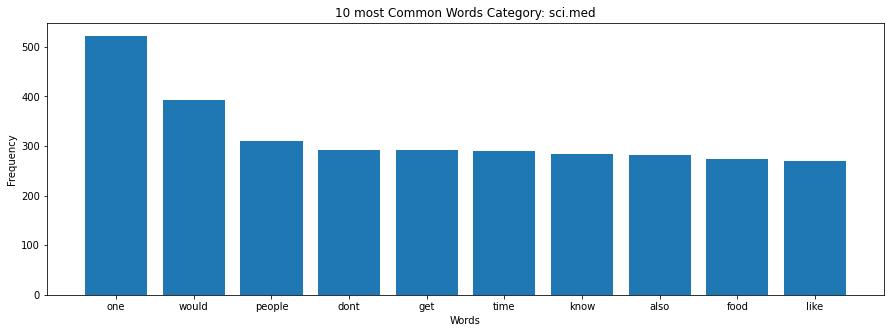

<Figure size 1440x720 with 0 Axes>

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



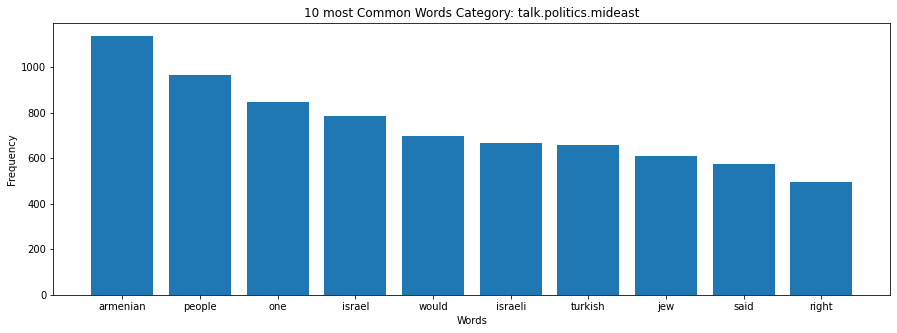

<Figure size 1440x720 with 0 Axes>

target_df:  1
18    well seems national sale tax gotten cnn news logo cool mean well seeing often man sure glad quit working taking seriously kept busting as watching time go frustrated id pretty damn mad yeah free health care oh yeeaaaahhhh heh heh bill make feel like dancing amazing prediction incredible bromeister take back feburary th incredible per middle class taxpayer new tax national sale tax aammmaaaazzzzzziinnnnggggg prediction nst raised ooops already okay nst raised ii unemployment rise iii tax revenue decline deficit increase well get another deficit reduction package everyone dance sing yup im gonna glancing watch bail pm amble lake hang sit wish email address total gumby saying clinton didnt propose nst paraphrase hilary clinton raise tax middle class pay program paraphrase bill clinton raise tax middle class pay programnever mention much working canadian pay tax free health care system oh really know average daily worker salary go towards tax canada mainly free health c

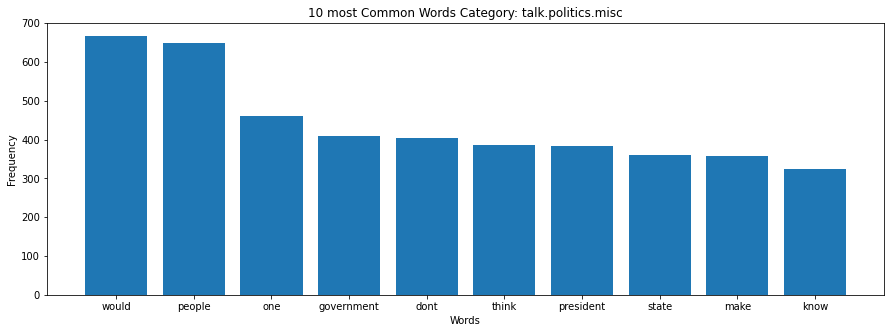

<Figure size 1440x720 with 0 Axes>

target_df:  1
19    think david koresh didnt solid structure sound biblical backing hour long tape broadcast ive enclosed partial list source cite quote exactly used christian sermon pretty good inspired david koresh born bethlehem ehhone way another much patience bad couldnt wait prospect god message much take believe david koresh really jesus christ know everybody scoffed guy hung cross claimed also son god took almost two thousand year forget preached love thy neighbor thyself anybody else wonder two guy setting fire agent provacateurs chris job easy person doesnt holts lawaddressed key issue long line post dean kaflowitz two post yesterday first made title post new thread dean kaflowitz terminally ironyimpaired second serious one appeared along thread chaney post challenge reissued revised youre insecure people reading post feel need write new post announcing wrote old post bother accept phoney youre laughingstockthink consensus become fbiatf muffed merely walked ambush feb koresh 

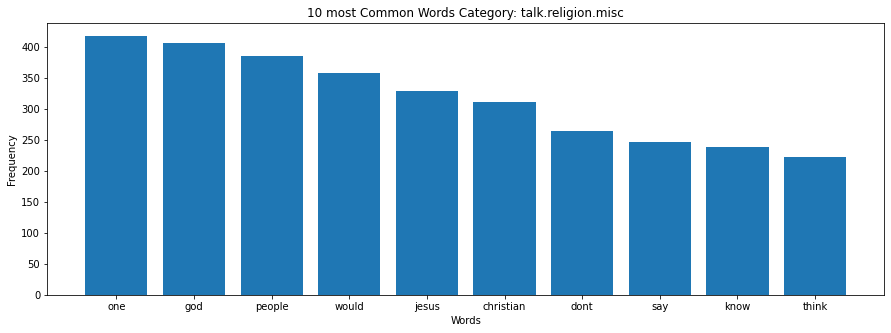

<Figure size 1440x720 with 0 Axes>

In [15]:
'''

Plots of  most common words by category

'''
from collections import Counter
import matplotlib.pyplot as plt
import re

pd.set_option('display.max_colwidth', None)  
for folder in train_cl_gr_df['folder name']:
    target_df = train_cl_gr_df[(train_cl_gr_df['folder name'] == folder)]

    print ("target_df: ", len(target_df))
    target_df.head(10)
    string_text =  target_df['text cleaned'].to_string()

    string_text=string_text.replace('\n',' ')
    string_text = re.sub(r"[^A-Za-z0-9 ]+", "", string_text)

    print(string_text)


    vocab ={}
    for word in string_text.split():
          if len(word) != 1: 
                if vocab.get(word.lower()) != None:
                    vocab[word.lower()] += 1

                    ##If word is not in dictionary then we put that word in our dictinary by making its frequnecy 1
                else:
                    vocab[word.lower()] = 1
                
    d = Counter(vocab)

    most_common = d.most_common(10)

    print('Most Common Words: ' , folder  , d)
    
    words = [word for word, _ in most_common]
    counts = [counts for _, counts in most_common]

    plt.bar(words, counts)
    plt.title("10 most Common Words Category: "  + str(folder))
    plt.ylabel("Frequency")
    plt.xlabel("Words")
    plt.rcParams['figure.figsize'] = [15, 5]
    plt.figure(figsize=(20,10))
    plt.show()


In [16]:
## Identify number of nouns and verbs etc in each group

In [17]:
import nltk
from nltk import pos_tag, word_tokenize, tokenize
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def NounCount(x):
    nounCount = sum(1 for word, pos in pos_tag(word_tokenize(x)) if pos.startswith('NN'))
    return nounCount

train_cl_gr_df["nouns"] = train_cl_gr_df["text cleaned"].apply(NounCount)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


KeyboardInterrupt: ignored

In [ ]:
def VerbCount(x):
  
    verbCount = sum(1 for word, pos in pos_tag(word_tokenize(x)) if pos.startswith('VB'))
    return  verbCount

train_cl_gr_df["verbs"] = train_cl_gr_df["text cleaned"].apply(VerbCount)

In [ ]:
# classify adverbs
def AdverbCount(x):
  
    adverbCount = sum(1 for word, pos in pos_tag(word_tokenize(x)) if pos.startswith('RB'))
    return  adverbCount

train_cl_gr_df["adverbs"] = train_cl_gr_df["text cleaned"].apply(AdverbCount)

In [ ]:
# classify adjectives
def AdjectiveCount(x):
  
    adjectiveCount = sum(1 for word, pos in pos_tag(word_tokenize(x)) if pos.startswith('JJ'))
    return  adjectiveCount

train_cl_gr_df["adjectives"] = train_cl_gr_df["text cleaned"].apply(AdjectiveCount)

In [ ]:
# classify other
def OtherCount(x):
  
    otherCount = sum(1 for word, pos in pos_tag(word_tokenize(x)) if not pos.startswith(('NN', 'VB', 'RB','JJ')))
    return  otherCount

train_cl_gr_df["other"] = train_cl_gr_df["text cleaned"].apply(OtherCount)

In [ ]:
train_cl_gr_df[["folder name", "nouns","verbs", "adverbs", "adjectives", "other" ]]

In [ ]:
# visualisation to show split of word types

ax = train_cl_gr_df.plot.barh(stacked=True,  title='POS Categorisation', x='folder name')

In [ ]:
'''Scaled - proportions of POS
Show the POS values as the proportion of the total number of words for each category

'''
df = train_cl_gr_df[[ "nouns","verbs", "adverbs", "adjectives", "other" ]]
df.loc[:,'Row_Total'] = df.sum(numeric_only=True, axis=1)

df['nouns'] = 100* (df['nouns'] / df['Row_Total'] )
df['verbs'] = 100* (df['verbs'] / df['Row_Total'] )
df['adverbs'] = 100* (df['adverbs'] / df['Row_Total'] )
df['adjectives'] = 100* (df['adjectives'] / df['Row_Total'] )
df['other'] = 100* (df['other'] / df['Row_Total'] )
df = df[[ "nouns","verbs", "adverbs", "adjectives", "other" ]]

df2 = train_cl_gr_df[['folder name']]

train_pos_df_scaled =df2.join(df)

In [ ]:
ax = train_pos_df_scaled.plot.barh(stacked=True,  title='POS Categorisation (Scaled)', x='folder name')

Bigrams


In [ ]:
from nltk import FreqDist
fd = FreqDist(train_cl_gr_df[['text cleaned']].to_string().split())
fd.plot(20)

In [ ]:
#frequency of bigrams
from nltk import bigrams
import matplotlib.pyplot as plt
#fig = plt.figure(figsize = (10,4))
fd_bg = FreqDist(map(' '.join, bigrams(train_cl_gr_df[['text cleaned']].to_string().split())))
fd_bg.plot(50, title='Top 30 Most Common Bigrams in Whole Text')

fig.savefig('freqDist.png', bbox_inches = "tight")

In [ ]:
# Bigrams :  pointwise mutual information

from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder

BigramCollocationFinder.from_words(train_cl_gr_df[['text cleaned']].to_string().split()).\
    nbest(BigramAssocMeasures().pmi, 20)

In [ ]:
BigramCollocationFinder.from_words(train_cl_gr_df[['text cleaned']].to_string().split()).\
    score_ngrams(BigramAssocMeasures().pmi)

In [ ]:
##  20.39 --> there isn't any difference in significance between these first few hundred bigrams.

In [ ]:
from nltk.collocations import TrigramAssocMeasures, TrigramCollocationFinder
TrigramCollocationFinder.from_words(train_cl_gr_df[['text cleaned']].to_string().split()).\
    nbest(TrigramAssocMeasures().pmi, 10)